<b>Заказчик</b>: Банк
<br><b>Цель</b>: Анализ оттока клиентов. Необходимо понять, как снизить отток с помощью сегментации клиентов
<br><b>Задачи</b>: <br>- Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонные уходить из банка. <br> - Описать портрет клиента склонного уходить из банка. <br> - Сформулировать и проверить статистические гипотезы.

## Загрузка датасета и просмотр основной информации

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [2]:
df=pd.read_csv('/datasets/bank_dataset.csv')
df=df.rename(columns = {'userid' : 'user_id', 'CreditCard' : 'credit_card'})
df.columns=df.columns.str.lower()
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


(    user_id  score       city gender  age  objects    balance  products  \
 0  15677338    619  Ярославль      Ж   42        2        NaN         1   
 1  15690047    608    Рыбинск      Ж   41        1   83807.86         1   
 2  15662040    502  Ярославль      Ж   42        8  159660.80         3   
 3  15744090    699  Ярославль      Ж   39        1        NaN         2   
 4  15780624    850    Рыбинск      Ж   43        2  125510.82         1   
 
    credit_card  loyalty  estimated_salary  churn  
 0            1        1         101348.88      1  
 1            0        1         112542.58      0  
 2            1        0         113931.57      1  
 3            0        0          93826.63      0  
 4            1        1          79084.10      0  ,
 None)

## Предобработка (анализ кол-ва пропусков, дубликатов и тд)

In [3]:
df.isna().sum(), df.duplicated().sum()

(user_id                0
 score                  0
 city                   0
 gender                 0
 age                    0
 objects                0
 balance             3617
 products               0
 credit_card            0
 loyalty                0
 estimated_salary       0
 churn                  0
 dtype: int64,
 0)

- Дубликатов нет
- Пропуски есть в столбце "Баланс счета"
- Заполнение или удаление пропусков исказит данные
- Пропуск скорее всего означает отсутствие счета, заполнение нулем исказит смысл

## Исследовательский анализ данных

In [4]:
#выделяю датасет ушедших клиентов
df1=df.query('churn == 1')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2037 non-null   int64  
 1   score             2037 non-null   int64  
 2   city              2037 non-null   object 
 3   gender            2037 non-null   object 
 4   age               2037 non-null   int64  
 5   objects           2037 non-null   int64  
 6   balance           1537 non-null   float64
 7   products          2037 non-null   int64  
 8   credit_card       2037 non-null   int64  
 9   loyalty           2037 non-null   int64  
 10  estimated_salary  2037 non-null   float64
 11  churn             2037 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 206.9+ KB


In [5]:
#выделяю датасет оставшихся клиентов
df2=df.query('churn == 0')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7963 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           7963 non-null   int64  
 1   score             7963 non-null   int64  
 2   city              7963 non-null   object 
 3   gender            7963 non-null   object 
 4   age               7963 non-null   int64  
 5   objects           7963 non-null   int64  
 6   balance           4846 non-null   float64
 7   products          7963 non-null   int64  
 8   credit_card       7963 non-null   int64  
 9   loyalty           7963 non-null   int64  
 10  estimated_salary  7963 non-null   float64
 11  churn             7963 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 808.7+ KB


<AxesSubplot:>

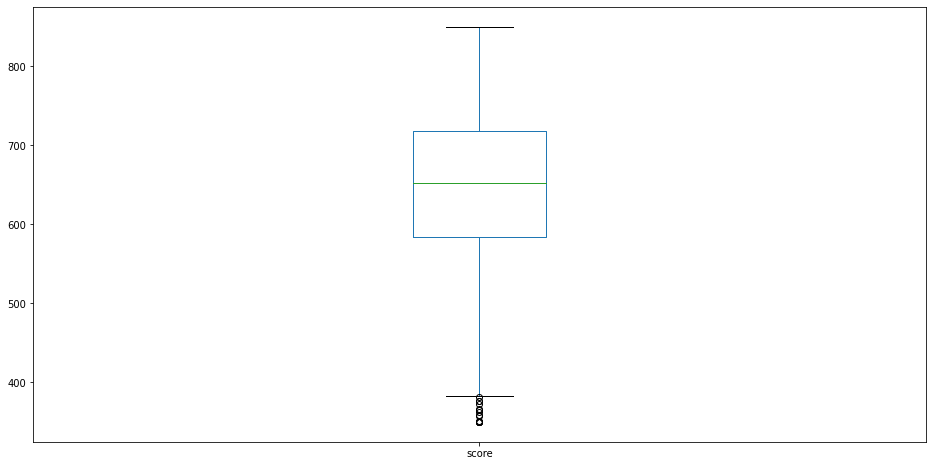

In [6]:
df.boxplot(column='score', figsize = (16,8), grid=False)

<AxesSubplot:>

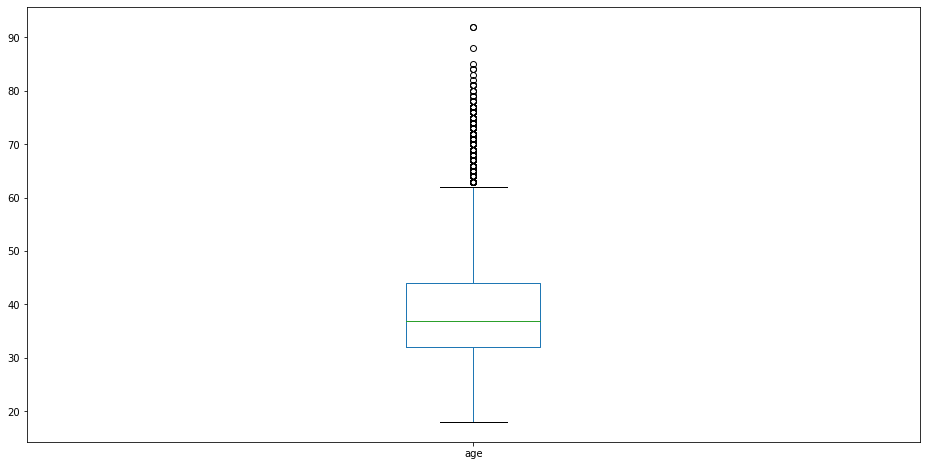

In [7]:
df.boxplot(column='age', figsize = (16,8), grid=False)

<AxesSubplot:>

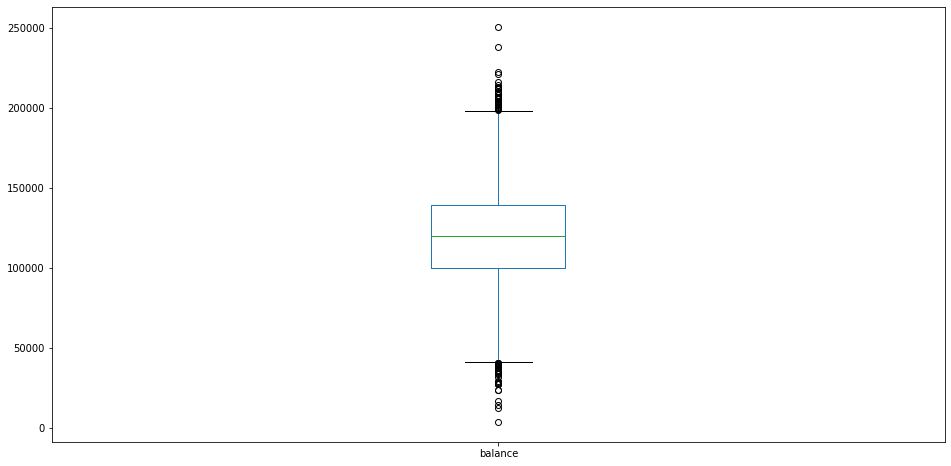

In [8]:
df.boxplot(column='balance', figsize = (16,8), grid=False)

<AxesSubplot:>

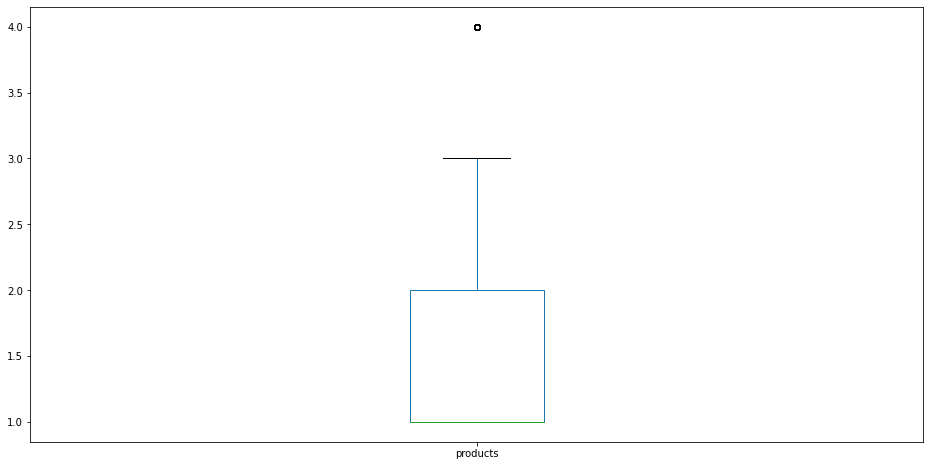

In [9]:
df.boxplot(column='products', figsize = (16,8), grid=False)

<AxesSubplot:>

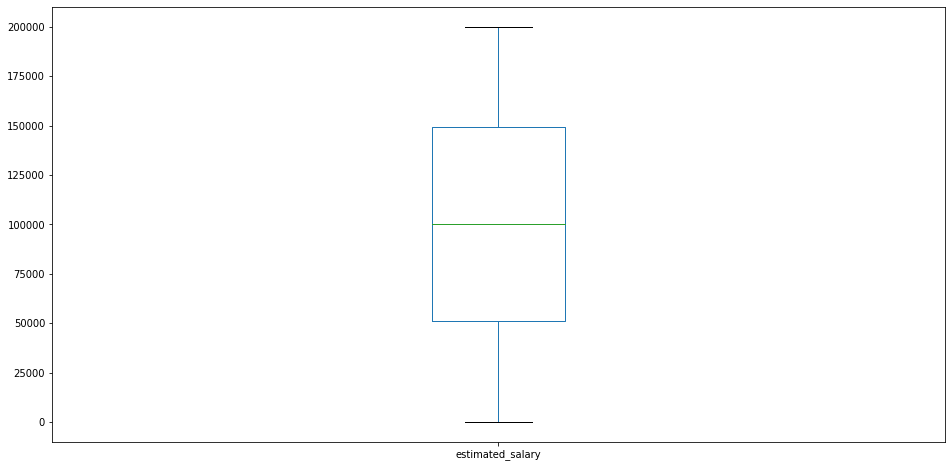

In [10]:
df.boxplot(column='estimated_salary', figsize = (16,8), grid=False)

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'objects'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'products'}>],
       [<AxesSubplot:title={'center':'credit_card'}>,
        <AxesSubplot:title={'center':'loyalty'}>,
        <AxesSubplot:title={'center':'estimated_salary'}>],
       [<AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

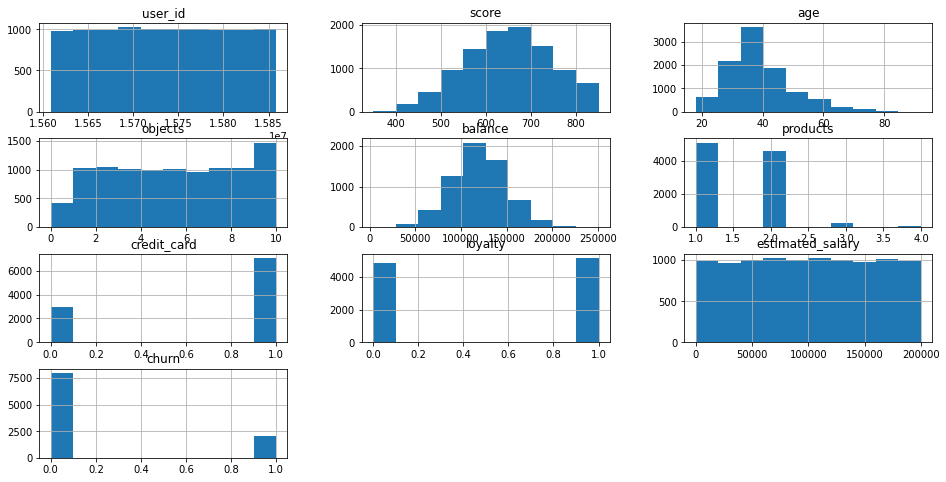

In [11]:
df.hist(figsize = (16,8))

- Выбрасов по количественным характеристикам не много, на результат повлиять не должно
- Распределение данных в характеристиках score  balance похоже на нормальное.
- Распределение данных в характеристиках estimated_salary и loyalty похоже на равномерное.
- Распределение данных в характеристиках age похоже на хи-квадратное.
- Распределение данных в характеристиках products похоже на логарифмически-номальное.
- 20% клиентов покидают банк, 80% остаются. Звучит правдоподобно
- Большее кол-во клиентов банка владеют кредитными картами.

### Сравнение распределений кредитного рейтинга ушедших и оставшихся клиентов

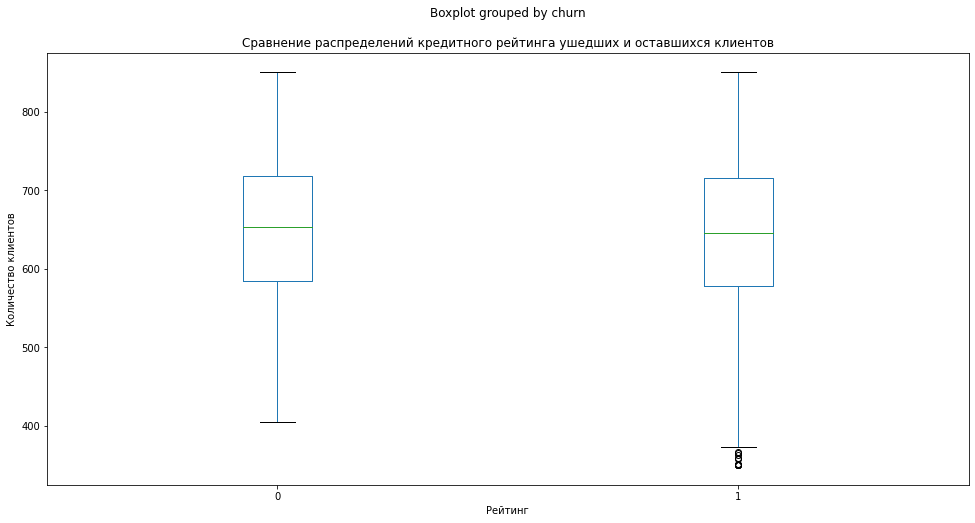

In [12]:
df.boxplot(by='churn', column='score', figsize = (16,8), grid=False)
plt.title('Сравнение распределений кредитного рейтинга ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Рейтинг')
plt.show()

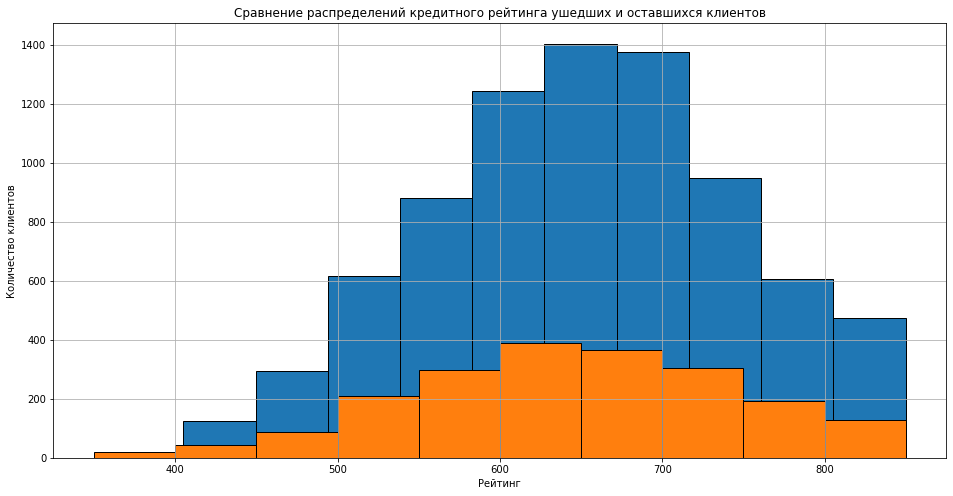

In [13]:
df2['score'].hist(figsize=(16,8), ec='black')
df1['score'].hist(figsize=(16,8), ec='black')
plt.title('Сравнение распределений кредитного рейтинга ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Рейтинг')
plt.show()

- Рисунок гистограммы ушедших и оставшихся совпадает, распределения похожи
- Данный критерий не является информативным
- У ушедших клиентов немного больше минимальных выбрасов

### Сравнение распределений возраста ушедших и оставшихся клиентов

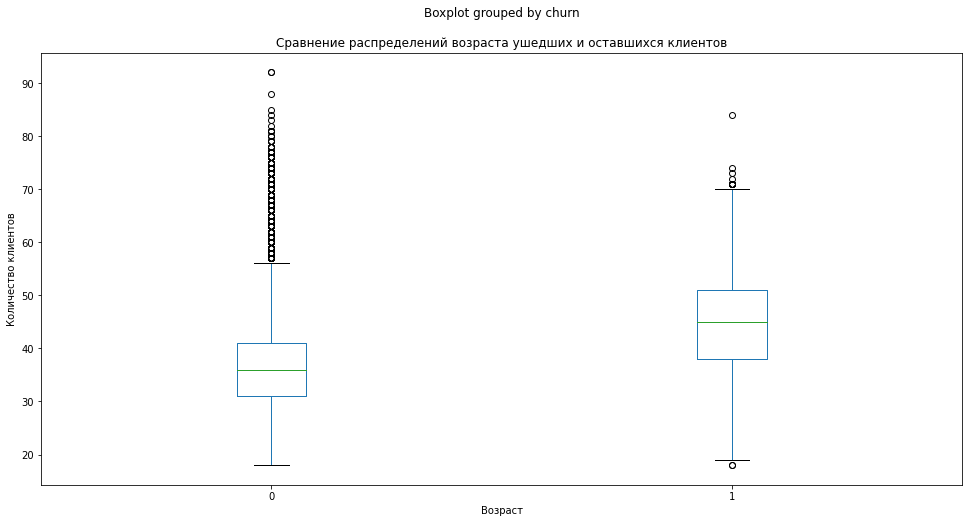

In [14]:
df.boxplot(by='churn', column='age', figsize = (16,8), grid=False)
plt.title('Сравнение распределений возраста ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст')
plt.show()

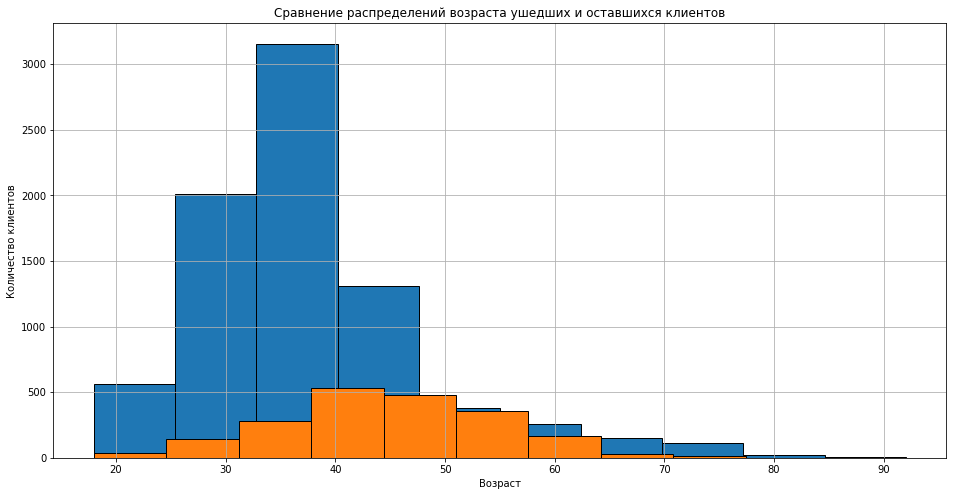

In [15]:
df2['age'].hist(figsize=(16,8), ec='black')
df1['age'].hist(figsize=(16,8), ec='black')
plt.title('Сравнение распределений возраста ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст')
plt.show()

- Клиенты в возрасте от 45 до 60 чаще перестают быть клиентами банка.
- Клиенты в возрасте от 20 до 35 лет чаще всего остаются клиентами банка.

### Сравнение распределений баланса счета ушедших и оставшихся клиентов

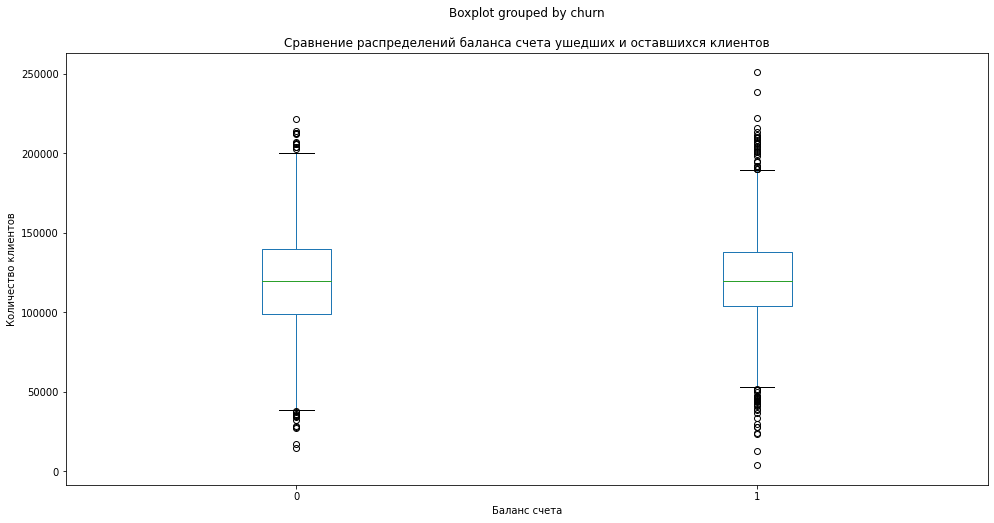

In [16]:
df.boxplot(by='churn', column='balance', figsize = (16,8), grid=False)
plt.title('Сравнение распределений баланса счета ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Баланс счета')
plt.show()

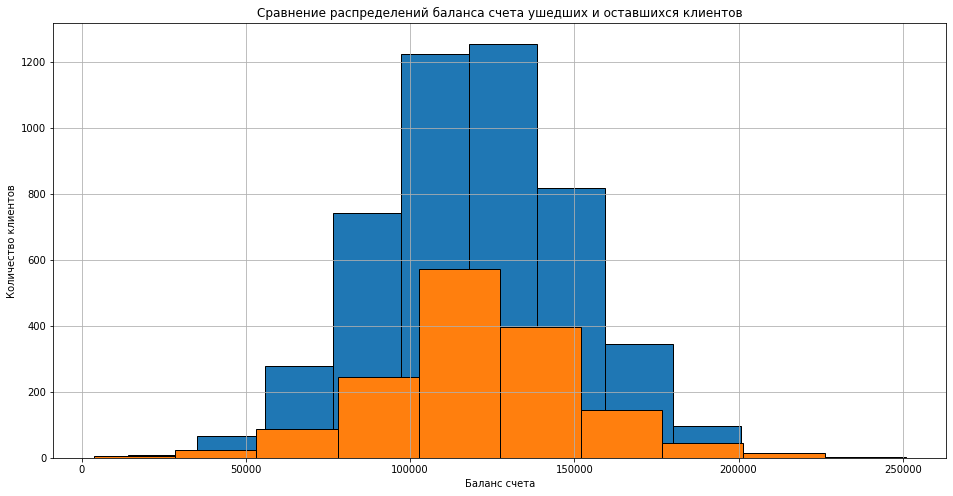

In [17]:
df2['balance'].hist(figsize=(16,8), ec='black')
df1['balance'].hist(figsize=(16,8), ec='black')
plt.title('Сравнение распределений баланса счета ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Баланс счета')
plt.show()

Нормальное распределение данных по обеим группам. Критерий не информативен

### Сравнение распределений владения объектами ушедших и оставшихся клиентов

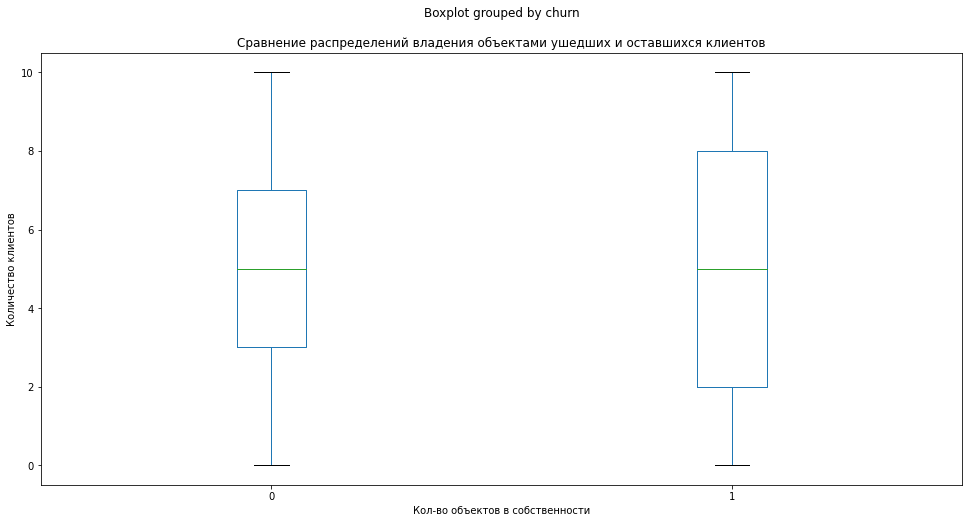

In [18]:
df.boxplot(by='churn', column='objects', figsize = (16,8), grid=False)
plt.title('Сравнение распределений владения объектами ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Кол-во объектов в собственности')
plt.show()

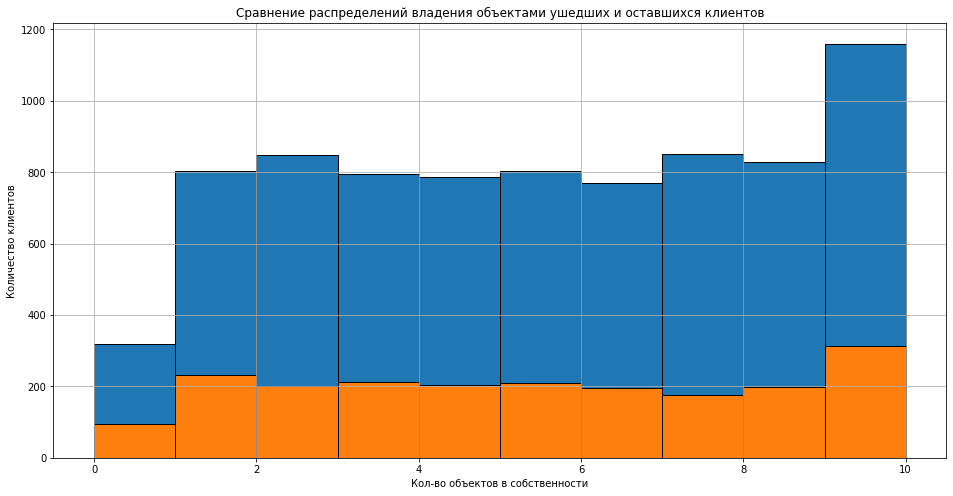

In [19]:
df2['objects'].hist(figsize=(16,8), ec='black')
df1['objects'].hist(figsize=(16,8), ec='black')
plt.title('Сравнение распределений владения объектами ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Кол-во объектов в собственности')
plt.show()

На всех группах приблизительно равное распределение оставшихся клиентов. Критерий не информативен

### Сравнение распределений по городам ушедших и оставшихся клиентов

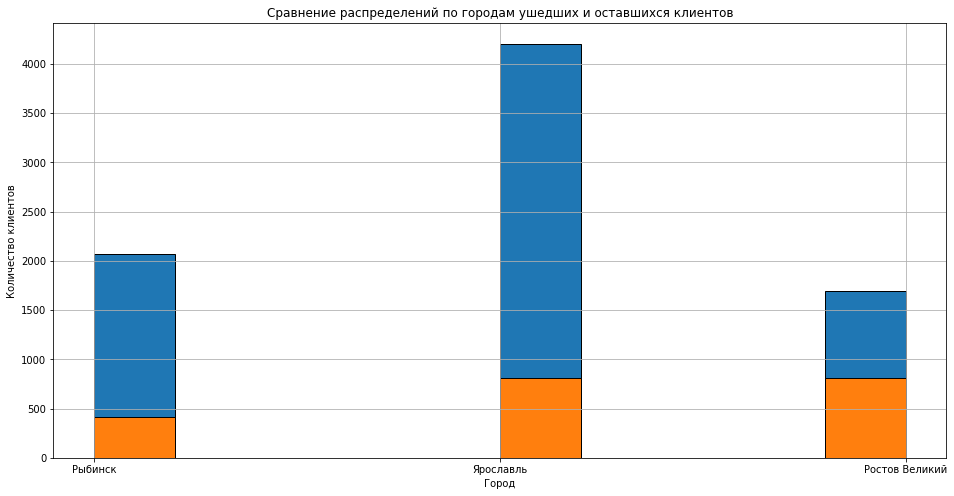

In [20]:
df2['city'].hist(figsize=(16,8), ec='black')
df1['city'].hist(figsize=(16,8), ec='black')
plt.title('Сравнение распределений по городам ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Город')
plt.show()

Чаще всего клиенты остаются клиентами банка из Ростава Великого.
Клиенты из Рыбинска и Ярославля чаще всего покидаюит банк.

### Сравнение распределений по полу ушедших и оставшихся клиентов

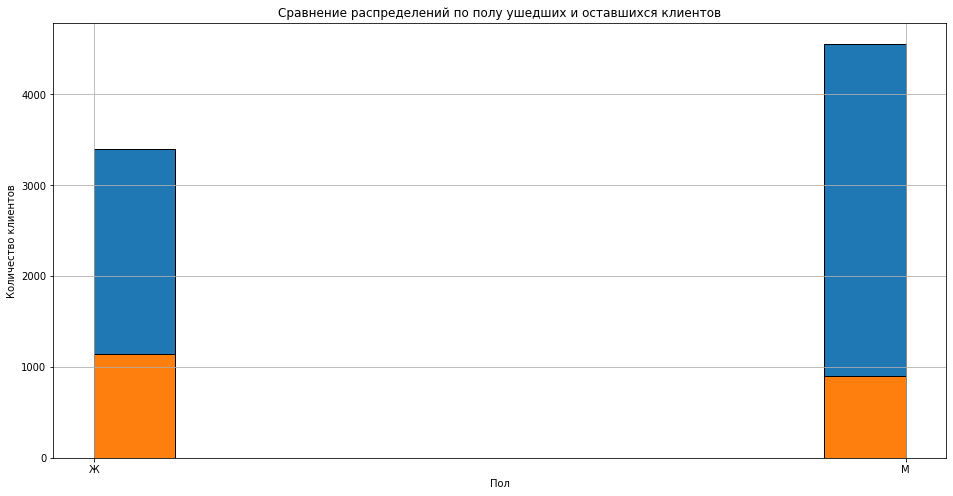

In [21]:
df2['gender'].hist(figsize=(16,8), ec='black')
df1['gender'].hist(figsize=(16,8), ec='black')
plt.title('Сравнение распределений по полу ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Пол')
plt.show()

- Женщины чаще склонные покидать банк.
- Мужчины чаще остаются клиентами банка

### Сравнение распределений по наличию карты ушедших и оставшихся клиентов

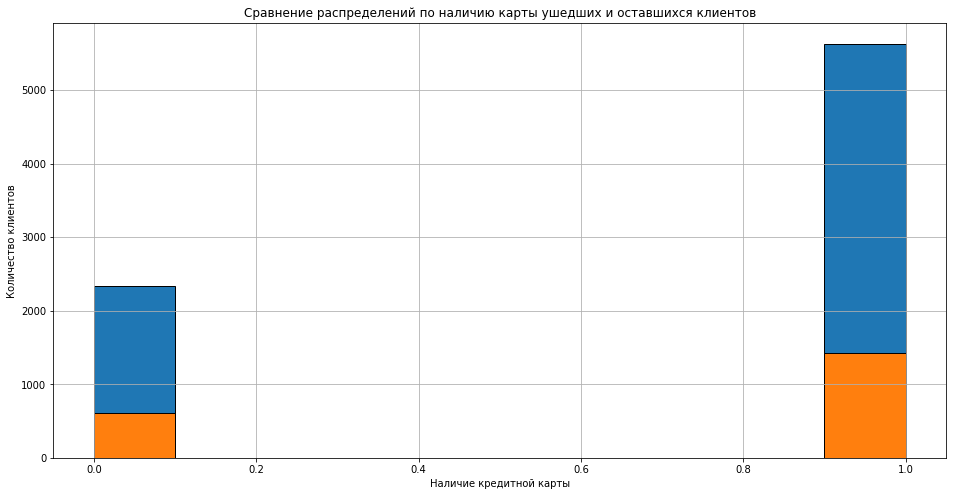

In [22]:
df2['credit_card'].hist(figsize=(16,8), ec='black')
df1['credit_card'].hist(figsize=(16,8), ec='black')
plt.title('Сравнение распределений по наличию карты ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Наличие кредитной карты')
plt.show()

In [23]:
percent_credit_card=round(df1['credit_card'].sum()/df['credit_card'].sum()*100, 2)
percent_no_credit_card=round((df1['credit_card'].count()-df1['credit_card'].sum())/(df['credit_card'].count()-df['credit_card'].sum())*100, 2)
print(f'Оставшиеся клиенты имеющие кредитные карты {percent_credit_card}%')
print(f'Оставшиеся клиенты неимеющие кредитные карты {percent_no_credit_card}%')

Оставшиеся клиенты имеющие кредитные карты 20.18%
Оставшиеся клиенты неимеющие кредитные карты 20.81%


На всех группах приблизительно равное распределение оставшихся клиентов.

###  Сравнение распределений по кол-ву используемых продуктов ушедших и оставшихся клиентов

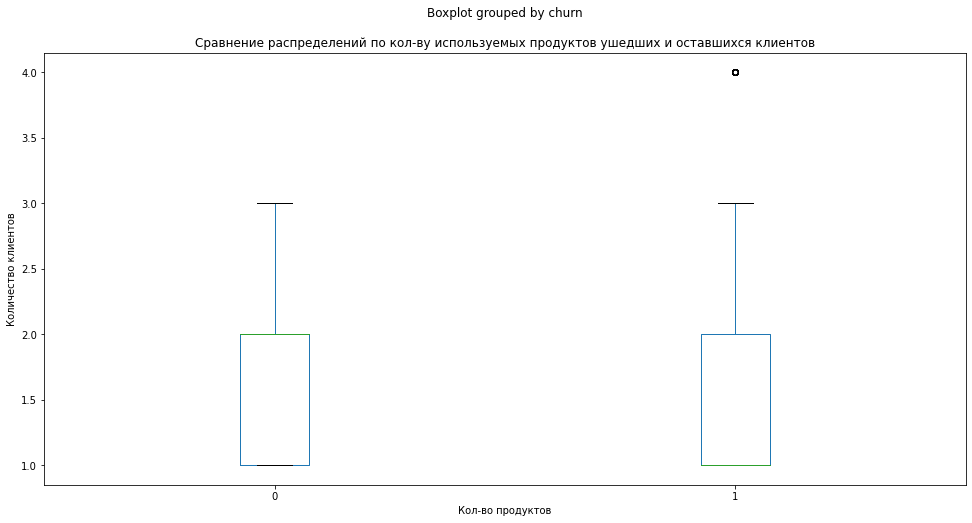

In [24]:
df.boxplot(by='churn', column='products', figsize = (16,8), grid=False)
plt.title('Сравнение распределений по кол-ву используемых продуктов ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Кол-во продуктов')
plt.show()

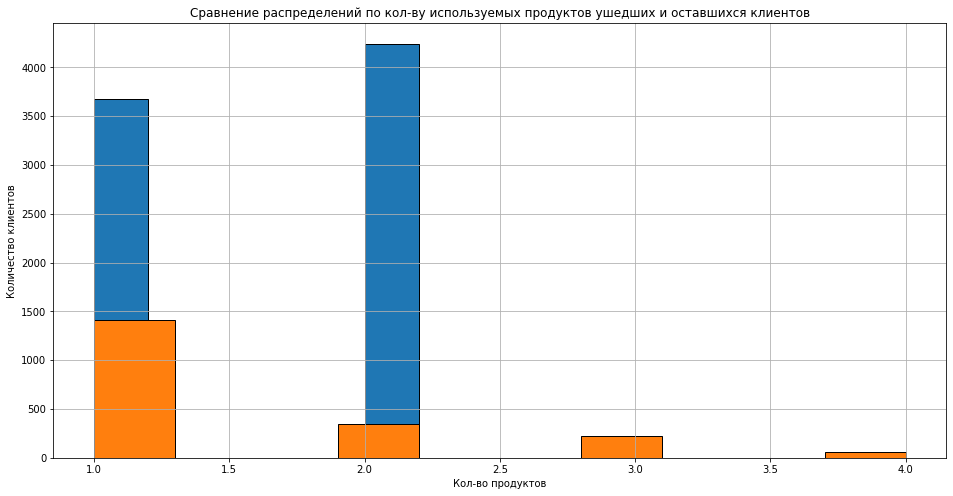

In [25]:
df2['products'].hist(figsize=(16,8), ec='black')
df1['products'].hist(figsize=(16,8), ec='black')
plt.title('Сравнение распределений по кол-ву используемых продуктов ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Кол-во продуктов')
plt.show()

Клиенты использующие 3 и более продуктов наиболее склонны уходить из банка.

Клиенты использующие 1 или 2 продукта остаются клиентами банка.

### Сравнение распределений по активности ушедших и оставшихся клиентов

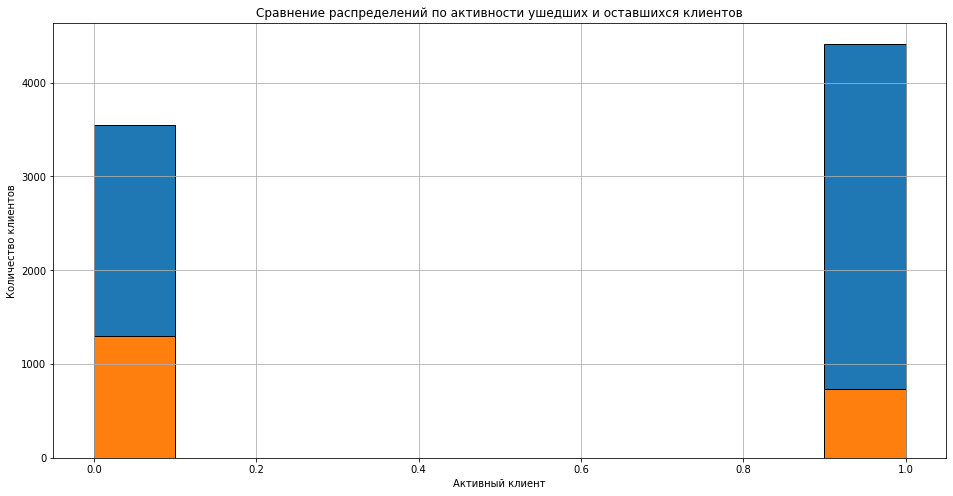

In [26]:
df2['loyalty'].hist(figsize=(16,8), ec='black')
df1['loyalty'].hist(figsize=(16,8), ec='black')
plt.title('Сравнение распределений по активности ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Активный клиент')
plt.show()

In [27]:
percent_no_loyalty=round(df1['loyalty'].sum()/df['loyalty'].sum()*100, 2)
percent_loyalty=round((df1['loyalty'].count()-df1['loyalty'].sum())/(df['loyalty'].count()-df['loyalty'].sum())*100, 2)
print(f'Ушло активных клиентов {percent_no_loyalty}%')
print(f'Ушло неактивных клиентов {percent_loyalty}%')

Ушло активных клиентов 14.27%
Ушло неактивных клиентов 26.85%


Активные клиенты чаще остаются в банке

### Сравнение распределений по уровню заработной платы ушедших и оставшихся клиентов

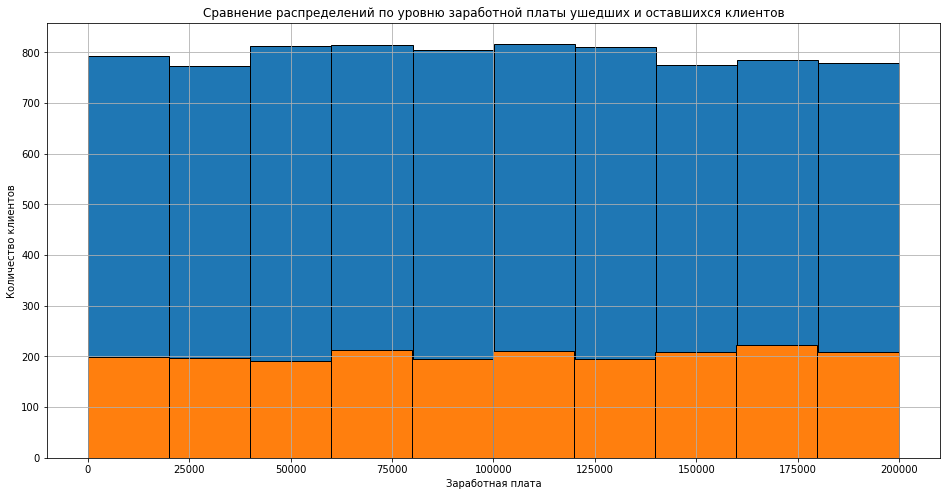

In [28]:
df2['estimated_salary'].hist(figsize=(16,8), ec='black')
df1['estimated_salary'].hist(figsize=(16,8), ec='black')
plt.title('Сравнение распределений по уровню заработной платы ушедших и оставшихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Заработная плата')
plt.show()

На всех группах приблизительно равное распределение оставшихся клиентов. Данный критерий не является информативным

<b>Портрет клиента склонного оставаться в банке</b>:
<br> Пол: Мужской
<br> Возраст: 20-35 лет
<br> Город: Ярославль или Рыбинск
<br> Кол-во используемых продуктов: 2
<br> Статус: Активный

<b>Портрет клиента склонного уходить из банка</b>:
<br> Пол: Женский
<br> Возраст:  45-60 лет
<br> Город: Ростов Великий
<br> Кол-во используемых продуктов: 3-4
<br> Статус: Неактивный

In [29]:
test= pd.get_dummies(df, columns=['city', 'products'])
test

,user_id,score,gender,age,objects,balance,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,products_1,products_2,products_3,products_4
0,15677338,619,Ж,42,2,NaN,1,1,101348.88,1,0,0,1,1,0,0,0
1,15690047,608,Ж,41,1,83807.86,0,1,112542.58,0,0,1,0,1,0,0,0
2,15662040,502,Ж,42,8,159660.80,1,0,113931.57,1,0,0,1,0,0,1,0
3,15744090,699,Ж,39,1,NaN,0,0,93826.63,0,0,0,1,0,1,0,0
4,15780624,850,Ж,43,2,125510.82,1,1,79084.10,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,М,39,5,NaN,1,0,96270.64,0,0,0,1,0,1,0,0
9996,15612628,516,М,35,10,57369.61,1,1,101699.77,0,0,0,1,1,0,0,0
9997,15627268,709,Ж,36,7,NaN,0,1,42085.58,1,0,0,1,1,0,0,0
9998,15725091,772,М,42,3,75075.31,1,0,92888.52,1,1,0,0,0,1,0,0


In [30]:
test.corr()

,user_id,score,age,objects,balance,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,products_1,products_2,products_3,products_4
user_id,1.000000,0.005308,0.009497,-0.014883,-0.008690,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800,-0.004049,-0.018501,0.014917,0.018706,-0.015462
score,0.005308,1.000000,-0.003965,0.000842,-0.004744,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.008928,-0.014813,0.015819,-0.004145,0.002455
age,0.009497,-0.003965,1.000000,-0.009997,-0.012822,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.039208,0.072852,-0.102604,0.067365,0.050092
objects,-0.014883,0.000842,-0.009997,1.000000,0.005827,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,-0.002848,-0.013423,0.012438,-0.000517,0.007716
balance,-0.008690,-0.004744,-0.012822,0.005827,1.000000,0.006721,-0.020418,-0.001856,0.017208,-0.002604,-0.000208,0.002759,0.003051,-0.003725,-0.001922,0.006889
credit_card,-0.014025,-0.005458,-0.011721,0.022583,0.006721,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.002467,-0.003845,0.003414,0.003186,-0.003778
loyalty,0.001665,0.025651,0.085472,-0.028362,-0.020418,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.003317,-0.022321,0.032802,-0.029864,-0.004938
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,-0.001856,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.003332,-0.010663,0.005795,0.012153,0.006314
churn,-0.006248,-0.027094,0.285323,-0.014001,0.017208,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.104955,0.185447,-0.292474,0.255862,0.153612
city_Ростов Великий,-0.003097,0.005538,0.046897,-0.000567,-0.002604,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.580359,0.033878,-0.051673,0.041945,0.026720


- Кореляция слабая, взаимосвязи между характиристиками клиента почти нет.
- Небольшая корреляция есть у статуса клиента банка (остался или нет) и возраста и некоторыз продуктов

## Формулирование и проверка гипотез

В основе гипотез лежит тезис о равенстве, соответственно использую метод для проверки гипотез о равенстве средних для зависимых (парных) выборок

### гипотеза:
<b>Нулевая гипотеза</b>: Средние доходы клиентов, которые ушли из банка и которые остались, одинаковые.
<br><b>Альтернативная</b>: Средние доходы клиентов, которые ушли из банка и которые остались, не равны.

In [31]:
df1['estimated_salary']

0       101348.88
2       113931.57
5       149756.71
7       119346.88
16        5097.67
          ...    
9981     53445.17
9982    115146.40
9991     69384.71
9997     42085.58
9998     92888.52
Name: estimated_salary, Length: 2037, dtype: float64

In [32]:
avg1_income=df1['estimated_salary']
avg2_income=df2['estimated_salary']

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(avg1_income, avg2_income)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.22644042802223352
Не получилось отвергнуть нулевую гипотезу


### гипотеза:
<b>Нулевая гипотеза</b>: Средние баллы кредитного скоринга клиентов, которые ушли из банка и которые остались, одинаковые.
<br><b>Альтернативная</b>: Средние баллы кредитного скоринга клиентов, которые ушли из банка и которые остались, не равны.

In [33]:
avg1_rating=df1['score']
avg2_rating=df2['score']

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(avg1_rating, avg2_rating)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.006738213892192373
Отвергаем нулевую гипотезу


<b>Выводы по гипотезам</b>:
- <i>Первую гипотезу</i> о равенстве средних доходов оставшихся и ушедших клиентов - не получилось отвергнуть. Значения статистически равны.
- <i>Вторую гипотезу</i> о равенстве рейтинга кредитного скоринга оставшихся и ушедших клиентов - отвергаем. Значение кредитных рейтингов ушедших и оставшихся клиентов разные.

<b>Выводы и рекоментации</b>:
- Люди в возрасте от 40-60 лет наиболее склонны покидать банк. Возможно стоит пересмотреть программу лояльности.
- Активные клиенты менее склонны покидать банк, имеет смысл стимулировать активность клиентов.
- Ростов Великий рекордсмен по проценту покинувших банк клиентов. Необходимо выявить причины. Возможно нужно заняться отделу контроля качества.
- Женщины более склонны уходить из банка. Необходимо выявить причины. Возможно нужно заняться отделу контроля качества.

<b>Портрет клиента склонного оставаться в банке</b>:
<br> Пол: Мужской
<br> Возраст: 20-35 лет
<br> Город: Ярославль или Рыбинск
<br> Кол-во используемых продуктов: 2
<br> Статус: Активный

<b>Портрет клиента склонного уходить из банка</b>:
<br> Пол: Женский
<br> Возраст:  45-60 лет
<br> Город: Ростов Великий
<br> Кол-во используемых продуктов: 3-4
<br> Статус: Неактивный